# Bondora_Peer_to_Peer_Lending_Loan


In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform (Bondora).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between 1st March 2009 and 27th January 2020. The data comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Bondora_raw.csv")

In [3]:
df.head(5)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [4]:
df.shape

(134529, 112)

In [5]:
df.tail(2)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
134527,2020-01-27,7CC7AB74-995B-4467-958A-A41700F78D59,285431,2015-01-05 16:56:12,2015-01-05 16:56:12,1840,0,1160.0,BO45A925,False,...,0,2016-04-01,2016-10-03,NaN,NaN,NaN,NaN,0.0,889.5,31-60
134528,2020-01-27,3A0DEBF3-292C-4EB4-B71A-A4170157749D,285630,2015-01-06 11:07:06,2015-01-06 11:07:06,2990,0,10.0,BO152923A,False,...,0,2015-09-14,2016-03-14,NaN,0.0,60.0,2015-09-09,0.0,604.8,91-120


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(56), int64(14), object(39)
memory usage: 112.3+ MB


In [7]:
df.isnull().sum()

ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64

In [8]:
for i in df.columns:
    print(i,":", df[i].isnull().sum())

ReportAsOfEOD : 0
LoanId : 0
LoanNumber : 0
ListedOnUTC : 0
BiddingStartedOn : 0
BidsPortfolioManager : 0
BidsApi : 0
BidsManual : 0
UserName : 0
NewCreditCustomer : 0
LoanApplicationStartedDate : 0
LoanDate : 0
ContractEndDate : 75546
FirstPaymentDate : 0
MaturityDate_Original : 0
MaturityDate_Last : 0
ApplicationSignedHour : 0
ApplicationSignedWeekday : 0
VerificationType : 45
LanguageCode : 0
Age : 0
DateOfBirth : 0
Gender : 45
Country : 0
AppliedAmount : 0
Amount : 0
Interest : 0
LoanDuration : 0
MonthlyPayment : 6685
County : 36840
City : 9794
UseOfLoan : 0
Education : 45
MaritalStatus : 45
NrOfDependants : 98929
EmploymentStatus : 197
EmploymentDurationCurrentEmployer : 876
EmploymentPosition : 98439
WorkExperience : 98007
OccupationArea : 86
HomeOwnershipType : 1652
IncomeFromPrincipalEmployer : 0
IncomeFromPension : 0
IncomeFromFamilyAllowance : 0
IncomeFromSocialWelfare : 0
IncomeFromLeavePay : 0
IncomeFromChildSupport : 0
IncomeOther : 0
IncomeTotal : 0
ExistingLiabilities : 

In [9]:
df.duplicated().sum() # we have no duplicate value

0

In [10]:
df.corr()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
LoanNumber,1.000000,-0.384473,-0.048516,-0.056821,-0.028044,-0.056337,0.000144,0.068871,0.104642,0.109456,...,-0.268650,0.103751,0.155308,0.059243,0.145186,-0.066368,-0.191165,-0.091459,0.086040,-0.088406
BidsPortfolioManager,-0.384473,1.000000,0.105199,0.057949,0.054073,0.001363,-0.001389,0.033211,-0.028838,-0.008038,...,0.342716,-0.135164,-0.096871,0.011059,0.022145,0.027525,0.052585,0.144614,0.024564,0.219283
BidsApi,-0.048516,0.105199,1.000000,-0.028702,-0.042591,0.005849,0.003103,-0.020796,-0.101278,-0.046432,...,0.015412,-0.005642,0.006983,0.051644,0.004009,0.015335,0.032234,0.020523,0.013739,0.027919
BidsManual,-0.056821,0.057949,-0.028702,1.000000,0.048430,0.003204,0.004820,-0.001976,-0.080547,0.028071,...,0.124604,-0.078664,-0.039869,-0.012427,0.040186,0.001231,0.009388,-0.164452,0.016056,0.149081
NewCreditCustomer,-0.028044,0.054073,-0.042591,0.048430,1.000000,0.096880,0.016852,0.203659,0.280293,-0.046890,...,0.133698,-0.649390,-0.649263,-0.361881,-0.109913,-0.132288,-0.119616,0.095019,0.006678,0.099156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PreviousEarlyRepaymentsCountBeforeLoan,-0.066368,0.027525,0.015335,0.001231,-0.132288,-0.011056,-0.001317,-0.043080,-0.047518,-0.001709,...,0.005543,0.137561,0.128275,0.120211,0.734822,1.000000,0.048916,0.017492,-0.007860,-0.000877
NextPaymentNr,-0.191165,0.052585,0.032234,0.009388,-0.119616,0.015572,-0.004215,-0.094843,-0.236614,0.052196,...,-0.208572,0.081008,0.070422,0.091102,0.002926,0.048916,1.000000,-0.028089,-0.038678,-0.167471
NrOfScheduledPayments,-0.091459,0.144614,0.020523,-0.164452,0.095019,0.006226,-0.008078,0.027627,0.107656,-0.046875,...,0.100960,-0.101821,-0.099852,-0.008552,0.025042,0.017492,-0.028089,1.000000,0.012821,0.109093
PrincipalDebtServicingCost,0.086040,0.024564,0.013739,0.016056,0.006678,-0.008939,-0.005659,0.000738,-0.015943,0.018333,...,-0.034204,-0.006611,0.003070,-0.003877,0.006326,-0.007860,-0.038678,0.012821,1.000000,0.152680


In [11]:
df.nunique()

ReportAsOfEOD                               1
LoanId                                 134529
LoanNumber                             134529
ListedOnUTC                            134130
BiddingStartedOn                       134135
                                        ...  
NrOfScheduledPayments                      64
ReScheduledOn                            1700
PrincipalDebtServicingCost               1310
InterestAndPenaltyDebtServicingCost     13879
ActiveLateLastPaymentCategory               9
Length: 112, dtype: int64

<AxesSubplot:>

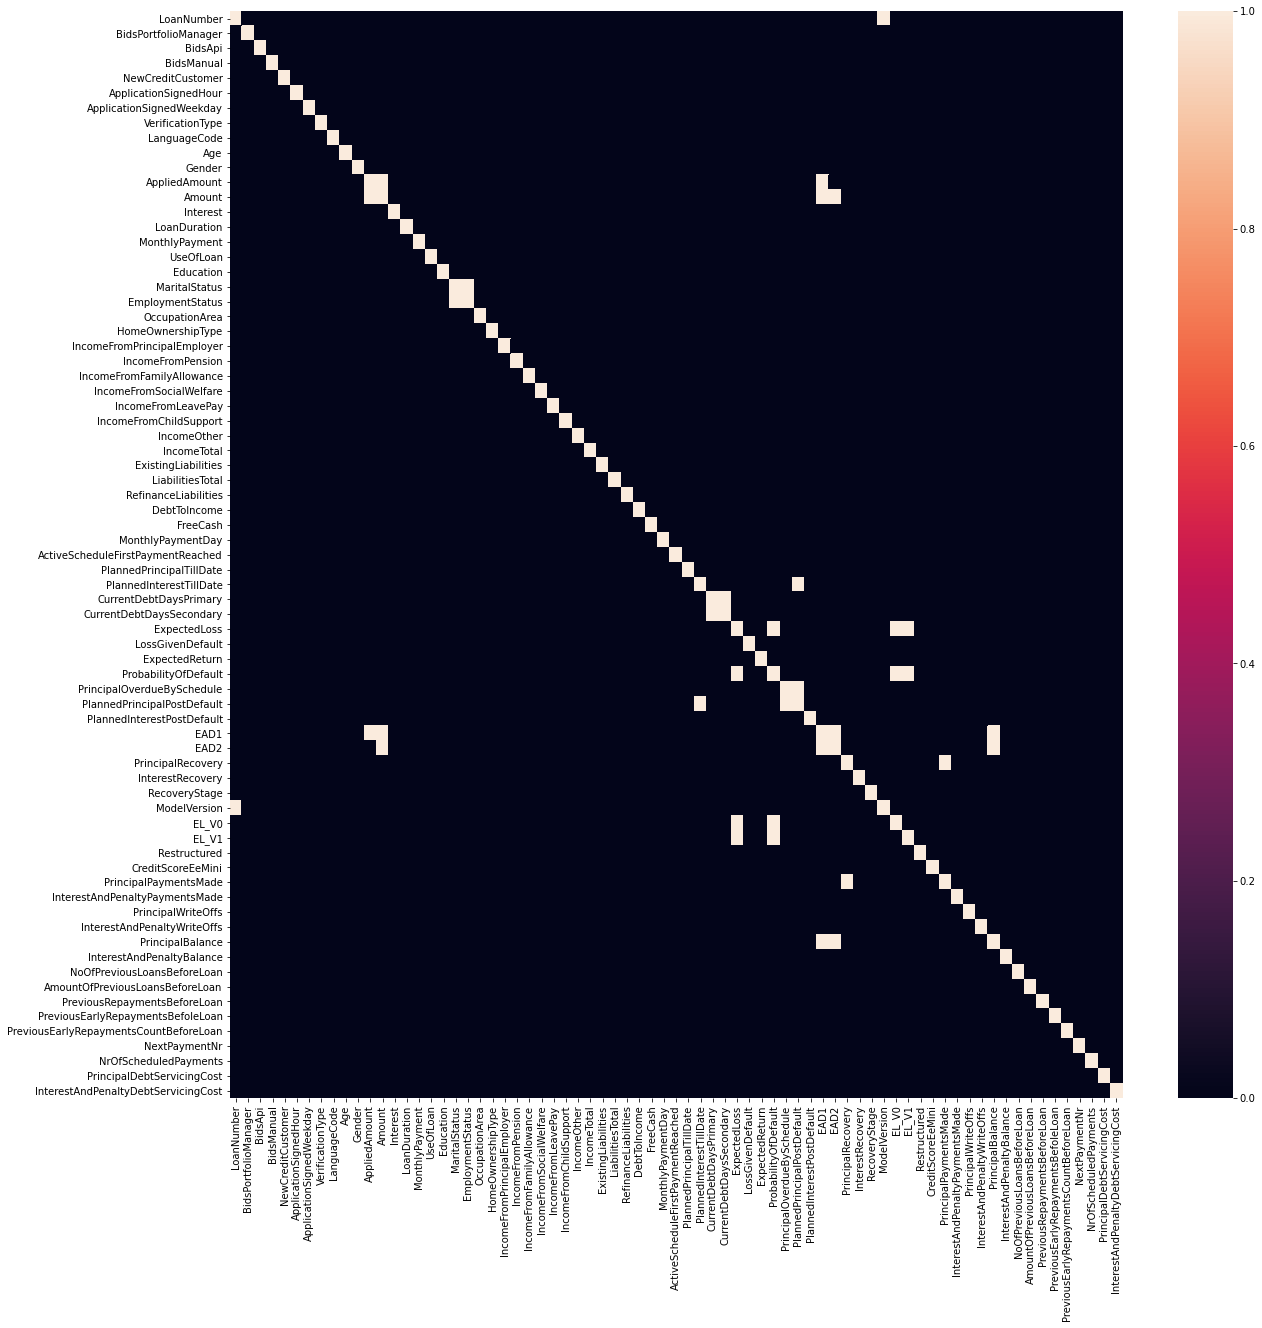

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr()>0.8)

In [13]:
df.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,...,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,...,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,...,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.206790e+05,155.000000,0.000000,96.000000,10.000000,2.000000,1.000000,1.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000
50%,9.235970e+05,465.000000,0.000000,317.000000,13.000000,4.000000,4.000000,3.000000,40.000000,0.000000,...,0.000000,1.000000,396.354100,197.980000,0.000000,0.000000,3.000000,60.000000,0.000000,0.000000
75%,1.311025e+06,1218.000000,5.000000,729.000000,17.000000,5.000000,4.000000,4.000000,50.000000,1.000000,...,202.900000,2.000000,4250.000000,780.950000,0.000000,0.000000,7.000000,60.000000,0.000000,17.330000
max,1.855339e+06,10625.000000,7570.000000,10630.000000,23.000000,7.000000,4.000000,22.000000,77.000000,2.000000,...,64494.770000,25.000000,53762.000000,34077.420000,48100.000000,11.000000,60.000000,72.000000,3325.330000,5295.290000


# Data Cleaning

In [14]:
# Mode imputation
df['County'].fillna(df['County'].mode()[0], inplace = True) 
df['City'].fillna(df['City'].mode()[0], inplace = True)
df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0], inplace = True)
df['EmploymentDurationCurrentEmployer'].fillna(df['EmploymentDurationCurrentEmployer'].mode()[0], inplace = True)
df['OccupationArea'].fillna(df['OccupationArea'].mode()[0], inplace = True)
df['VerificationType'].fillna(df['VerificationType'].mode()[0], inplace = True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Education'].fillna(df['Education'].mode()[0], inplace = True)
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0], inplace = True)
df['HomeOwnershipType'].fillna(df['HomeOwnershipType'].mode()[0], inplace = True)
df['Rating'].fillna(df['Rating'].mode()[0], inplace = True)
df['ModelVersion'].fillna(df['ModelVersion'].mode()[0], inplace = True)

In [15]:
#  Median imputation
df['MonthlyPayment'].fillna(df['MonthlyPayment'].median(), inplace = True) 
df['DebtToIncome'].fillna(df['DebtToIncome'].median(), inplace = True)
df['FreeCash'].fillna(df['FreeCash'].median(), inplace = True)
df['PlannedInterestTillDate'].fillna(df['PlannedInterestTillDate'].median(), inplace = True)
df['ExpectedLoss'].fillna(df['ExpectedLoss'].median(), inplace = True)
df['LossGivenDefault'].fillna(df['LossGivenDefault'].median(), inplace = True)
df['ProbabilityOfDefault'].fillna(df['ProbabilityOfDefault'].median(), inplace = True)
df['ExpectedReturn'].fillna(df['ExpectedReturn'].median(), inplace = True)

In [16]:
## Removing Features which have least impact on loan
df.drop(['ReportAsOfEOD','BiddingStartedOn', 'NrOfDependants', 'EmploymentPosition', 'WorkExperience', 'CurrentDebtDaysPrimary', 'CurrentDebtDaysSecondary', 'DebtOccuredOnForSecondary', 'Rating_V0', 'Rating_V1', 'Rating_V2','EL_V0'], axis = 1, inplace = True)

In [17]:
for i in df.columns:
    print(i,":", df[i].isnull().sum())

LoanId : 0
LoanNumber : 0
ListedOnUTC : 0
BidsPortfolioManager : 0
BidsApi : 0
BidsManual : 0
UserName : 0
NewCreditCustomer : 0
LoanApplicationStartedDate : 0
LoanDate : 0
ContractEndDate : 75546
FirstPaymentDate : 0
MaturityDate_Original : 0
MaturityDate_Last : 0
ApplicationSignedHour : 0
ApplicationSignedWeekday : 0
VerificationType : 0
LanguageCode : 0
Age : 0
DateOfBirth : 0
Gender : 0
Country : 0
AppliedAmount : 0
Amount : 0
Interest : 0
LoanDuration : 0
MonthlyPayment : 0
County : 0
City : 0
UseOfLoan : 0
Education : 0
MaritalStatus : 0
EmploymentStatus : 0
EmploymentDurationCurrentEmployer : 0
OccupationArea : 0
HomeOwnershipType : 0
IncomeFromPrincipalEmployer : 0
IncomeFromPension : 0
IncomeFromFamilyAllowance : 0
IncomeFromSocialWelfare : 0
IncomeFromLeavePay : 0
IncomeFromChildSupport : 0
IncomeOther : 0
IncomeTotal : 0
ExistingLiabilities : 0
LiabilitiesTotal : 0
RefinanceLiabilities : 0
DebtToIncome : 0
FreeCash : 0
MonthlyPaymentDay : 0
ActiveScheduleFirstPaymentReached 

In [18]:
a = df[df['Age'] <18].index
df.drop(a, inplace = True, axis = 0)

#### Status Feature

In [19]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31569
Name: Status, dtype: int64

In [20]:
df.DefaultDate.notnull().sum()

42888

In [21]:
df[df.DefaultDate.notnull()]['Status'].value_counts()

Late       37111
Repaid      5656
Current      121
Name: Status, dtype: int64

In [22]:
df.loc[df['DefaultDate'].notnull(), 'Status'] = 'Default'
df.loc[df['DefaultDate'].isnull(), 'Status'] = 'Not Default'

In [23]:
df[df.DefaultDate.notnull()]['Status'].value_counts()

Default    42888
Name: Status, dtype: int64

In [24]:
df.Status.value_counts()

Not Default    91588
Default        42888
Name: Status, dtype: int64

In [25]:
encoder = LabelEncoder()
df['Status'] = encoder.fit_transform(df['Status'])
df['Status'].value_counts()

1    91588
0    42888
Name: Status, dtype: int64